### Table Content
    01. Importing the newest dataframe
    02. Merging department dataframe with the newestdatafram
    03. PII
    04. Group States into Regions
    05. Creating exclusion flag for low-activity customers
    06. Creating customer profiles
        a. Age profile
        b. Income profile
        c. Number of Dependants Profile
        d. bakery Profile
        e. Frozen Profile
     
    07. Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
        a. Age profile aggregation
        b. Income profile aggregation
        c. Number of Dependants Profile aggregation
        d. bakery Profile aggregation
        e. Frozen Profile aggregation
        
    08. Creating visualizations to show the distribution of profiles
        a. Age profile distribution
        b. Income profile distribution
        c. Number of Dependants Profile distribution
        d. bakery Profile distribution
        e. Frozen Profile distribution
        
    09. Exporting visualizations

In [3]:
# Import libarires
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import scipy

In [203]:
# Create a pth to import or export the dataframe
path = r'C:\Users\SuperHome\Documents\Instacart Basket Analysis'

###     01. Importing the newest dataframe

In [5]:
# Import the newest dataframe that merged by dataframe 'customers'
ord_pro_all = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','order_product_all.pkl' ))

In [204]:
# Checking dataframe after importing
ord_pro_all.head()

,user_id,Gender,State,Age,n_dependants,fam_status,income,order_id,order_number,day_of_week,...,prices,price_label,two_busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_product_price,spending_flag,median_days_since_prior_order,frequency_flag
0,26711,Female,Missouri,48,3,married,165665,2543867,5,1,...,9.0,Mid-range product,two-busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Female,Missouri,48,3,married,165665,1285508,7,5,...,9.0,Mid-range product,regular-busy days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Female,Missouri,48,3,married,165665,2578584,8,1,...,9.0,Mid-range product,two-busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Female,Missouri,48,3,married,165665,423547,2,2,...,12.6,Mid-range product,regular-busy days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Female,Missouri,48,3,married,165665,2524893,3,3,...,12.6,Mid-range product,two-slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer


###    02. Merging department dataframe with the newestdatafram

In [206]:
# Import departments
depart = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','department_wrangled.csv'), index_col=False)

In [207]:
depart

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [208]:
# Renaming column 'Unnamed: 0'
depart.rename(columns = {'Unnamed: 0':'department_id'}, inplace=True)

In [209]:
# Merging dataframe
df_final = ord_pro_all.merge(depart, on = ['department_id'])

In [210]:
df_final.shape

(32404859, 29)

In [13]:
# Delete department dataframe as we don't use it anymore 
del depart

###    03. PII
    Answer: As the customers original dataframe contains customer's first name and last name which considered as the personally identifiable information(PII) and the first name column contained too many nan values, so before I merge the datafram I created a new dataframe to drop the fist name and last name columns alrady. Therefore,there isn't any information to related about the PII.
    

###    04. Group States into Regions

In [14]:
# Create regions
region = []
for value in df_final['State']:
    if value in ('Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey'):
        region.append('Northeast')
    elif value in ('Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri'):
        region.append('Midwest')
    elif value in ('Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana'):
        region.append('South')
    elif value in ('Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii'):
        region.append('West')
    else:
        region.append('Wrong Data')


In [15]:
df_final['Region'] = region

In [16]:
# Checking new column
df_final['Region'].nunique() # As we created 4 region groups,so there would be a number 4 for the result

4

In [17]:
df_final.groupby('spending_flag').agg({'Region':['value_counts']})

Region
                        value_counts
spending_flag Region                
High spender  South            40579
              West             31242
              Midwest          29265
              Northeast        18642
Low spender   South         10751306
              West           8261671
              Midwest        7568060
              Northeast      5704094

* There are differences between different regions based on the spending habits.

* The South region achived the top1 positions on both high spending and low spending and this number of customers are obvisouly than the other regions. Northwest is in the bottom level for both high spending and low spending.

* However, we can easy to get that most orders happend on low spending, which can indicates that the low price product seems attract more attention when customers buying the products.

###    05. Creating exclusion flag for low-activity customers

In [18]:
# Create an exclusion flag based on the max_order column
df_final.loc[df_final['max_order'] < 5, 'exclusion_flag'] = 'Exclude'

In [19]:
df_final['exclusion_flag'].value_counts()

Exclude    1440295
Name: exclusion_flag, dtype: int64

In [20]:
low_activity = df_final.loc[df_final['max_order'] < 5]

In [21]:
low_activity

,user_id,Gender,State,Age,n_dependants,fam_status,income,order_id,order_number,day_of_week,...,busiest_period_of_day,max_order,loyalty_flag,average_product_price,spending_flag,median_days_since_prior_order,frequency_flag,department,Region,exclusion_flag
79,168851,Male,South Carolina,30,0,single,63712,1903574,1,2,...,Average orders,3,New customer,7.485714,Low spender,15.0,Regular customer,beverages,South,Exclude
80,168851,Male,South Carolina,30,0,single,63712,1193140,2,3,...,Most orders,3,New customer,7.485714,Low spender,15.0,Regular customer,beverages,South,Exclude
197,9944,Male,Wisconsin,26,1,married,91826,246990,1,1,...,Most orders,4,New customer,8.161798,Low spender,30.0,Non-frequent customer,beverages,Midwest,Exclude
198,13313,Male,Alaska,31,2,married,91111,30149,3,0,...,Average orders,3,New customer,9.175000,Low spender,11.0,Regular customer,beverages,West,Exclude
199,13313,Male,Alaska,31,2,married,91111,30149,3,0,...,Average orders,3,New customer,9.175000,Low spender,11.0,Regular customer,beverages,West,Exclude
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404786,164583,Female,Colorado,41,1,married,100231,973413,2,4,...,Average orders,4,New customer,8.227473,Low spender,25.0,Non-frequent customer,other,West,Exclude
32404787,164583,Female,Colorado,41,1,married,100231,1833214,3,1,...,Most orders,4,New customer,8.227473,Low spender,25.0,Non-frequent customer,other,West,Exclude
32404788,164583,Female,Colorado,41,1,married,100231,1788852,4,5,...,Fewest orders,4,New customer,8.227473,Low spender,25.0,Non-frequent customer,other,West,Exclude
32404853,98736,Male,Wyoming,23,1,married,77233,561019,4,5,...,Average orders,4,New customer,7.427119,Low spender,7.0,Frequent customer,other,West,Exclude


In [29]:
# Export this sample dataframe
low_activity.to_pickle(os.path.join(path,'low_activity.pkl'))

In [22]:
# Create a new dataframe without the low activity 
df_active = df_final.loc[df_final['max_order'] >= 5]

In [23]:
df_active.shape

(30964564, 31)

In [24]:
del df_final

###    06. Creating customer profiles
    a. Age profile
    b. Income profile
    c. Number of Dependants Profile
    d. Produce Profile
    e. Frozen Profile
    f. Vegetarian profile
    g. Alcohol drinker Profile 

#### a. Age profile

In [25]:
df_active['Age'].unique() # To check the age range

array([48, 36, 35, 40, 26, 43, 20, 47, 19, 45, 75, 51, 70, 77, 64, 67, 72,
       74, 57, 80, 31, 66, 55, 54, 73, 37, 30, 56, 24, 27, 46, 61, 25, 32,
       28, 39, 33, 60, 52, 62, 76, 78, 21, 58, 29, 63, 22, 81, 38, 50, 59,
       49, 53, 79, 42, 41, 18, 34, 23, 69, 44, 65, 71, 68], dtype=int64)

In [26]:
# Create age profile
df_active.loc[(df_active['Age'] <= 35) & (df_active['n_dependants'] > 0), 'age_profile'] = 'Young parent'

In [28]:
df_active.loc[(df_active['Age'] >= 55) & (df_active['n_dependants'] > 0), 'age_profile'] = 'Old parent'

In [29]:
df_active.loc[(df_active['Age'] < 55) & (df_active['Age'] > 35) & (df_active['n_dependants'] > 0), 'age_profile'] = 'Mid parent'

In [31]:
df_active.loc[df_active['n_dependants'] == 0, 'age_profile'] = 'Single'

In [35]:
df_active.shape

(30964564, 32)

#### b. Income profile

In [38]:
df_active['income'].min()

25903

In [39]:
df_active['income'].max()

593901

In [40]:
# Create income profile as the income range is in (25903, 593901)
income = []
for value in df_active['income']:
    if value <= 55000:
        income.append('Low income')
    elif value > 55000 and value < 125000:
        income.append('Mid income')
    elif value >= 125000:
        income.append('High income')
    else:
        income.append('No Data')

In [41]:
df_active['income_group'] = income

In [42]:
df_active['income_group'].value_counts(dropna=False)

Mid income     18234132
High income     8278044
Low income      4452388
Name: income_group, dtype: int64

#### c. Number of Dependants Profile

In [44]:
# Create a boolen column to define whether customers have depandents or not
df_active.loc[df_active['n_dependants'] > 0, 'dependant_group'] = 'Have dependants'
df_active.loc[df_active['n_dependants'] == 0, 'dependant_group'] = 'No dependants'

In [45]:
df_active.shape

(30964564, 34)

In [46]:
df_active['dependant_group'].value_counts(dropna=False)

Have dependants    23224883
No dependants       7739681
Name: dependant_group, dtype: int64

#### d. bakery Profile

In [48]:
# Create some profile in certain goods based on department column
df_active['department'].value_counts(dropna=False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

In [51]:
#Creating buying_flags for bought  bakery staffs, 1 indicates buy 0 indicates no 
df_active['bakery_status'] = [1 if x == 'bakery' else 0 for x in df_active['department']]
df_active['bakery_status'].value_counts(dropna=False)

0    29843736
1     1120828
Name: bakery_status, dtype: int64

#### e. Frozen Profile

In [53]:
#Creating buying_flags for bought pets staffs, 1 indicates buy 0 indicates no 
df_active['frozen_status'] = [1 if x == 'frozen' else 0 for x in df_active['department']]
df_active['frozen_status'].value_counts(dropna=False)

0    28842833
1     2121731
Name: frozen_status, dtype: int64

###    07. Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

#### a. Age profile aggregation

In [60]:
df_active.groupby('age_profile').agg({'order_number':['mean'],'prices':['max'],'days_since_prior_order':['min']})

,order_number,prices,days_since_prior_order
,mean,max,min
age_profile,,,
Mid parent,17.900425,25.0,0.0
Old parent,17.726271,25.0,0.0
Single,17.957922,25.0,0.0
Young parent,17.815233,25.0,0.0


#### b. Income profile aggregation

In [61]:
df_active.groupby('income_group').agg({'order_number':['mean'],'prices':['max'],'days_since_prior_order':['min']})

,order_number,prices,days_since_prior_order
,mean,max,min
income_group,,,
High income,17.922180,25.0,0.0
Low income,16.994771,25.0,0.0
Mid income,17.999129,25.0,0.0


#### c. Number of Dependants Profile

In [63]:
df_active.groupby('dependant_group').agg({'order_number':['mean'],'prices':['max'],'days_since_prior_order':['max','min']})

order_number prices days_since_prior_order     
                        mean    max                    max  min
dependant_group                                                
Have dependants    17.792891   25.0                   30.0  0.0
No dependants      17.957922   25.0                   30.0  0.0

#### d. bakery Profile aggregation

In [65]:
# 1 indicates buy, 0 indicates no buy
df_active.groupby('bakery_status').agg({'order_number':['mean'],'prices':['max'],'days_since_prior_order':['max','min']})

order_number prices days_since_prior_order     
                      mean    max                    max  min
bakery_status                                                
0                17.833297   25.0                   30.0  0.0
1                17.856619   15.0                   30.0  0.0

#### e. Frozen Profile

In [66]:
# 1 indicates buy, 0 indicates no buy
df_active.groupby('frozen_status').agg({'order_number':['mean'],'prices':['max'],'days_since_prior_order':['max','min']})

order_number prices days_since_prior_order     
                      mean    max                    max  min
frozen_status                                                
0                17.957240   25.0                   30.0  0.0
1                16.160739   15.0                   30.0  0.0

###    08. Creating visualizations to show the distribution of profiles
    a. Age profile distribution
    b. Income profile distribution
    c. Number of Dependants Profile distribution
    d. bakery Profile distribution
    e. Frozen Profile distribution


#### a. Age profile distribution

In [67]:
df_active['age_profile'].value_counts(dropna=False)

Old parent      12477936
Single           7739681
Mid parent       6939459
Young parent     3807488
Name: age_profile, dtype: int64

In [69]:
style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

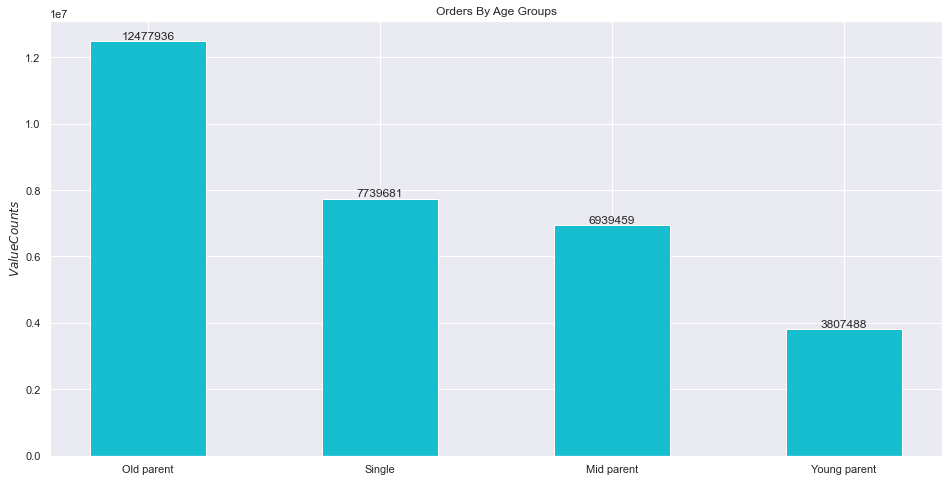

In [180]:
# Create a bar chart to show the order of age groups
fig, ax = plt.subplots(figsize = (16, 8))
x = ['Old parent','Single','Mid parent','Young parent']
y = df_active['age_profile'].value_counts(dropna=False)

plt.bar(x, y, width = 0.5, color = 'tab:cyan')

# Create a title
ax.set(title = 'Orders By Age Groups', ylabel = '$Value Counts$')

# Create labels
for a, b, label in zip(x, y, y):
    plt.text(a, b, label, ha = 'center', va = 'bottom')

# Hiding ticks
ax.tick_params(axis = 'both', which = 'both', length=0)

plt.savefig(os.path.join(path,'bar_age_of_group.png'))
plt.show()

#### b. Income profile distribution

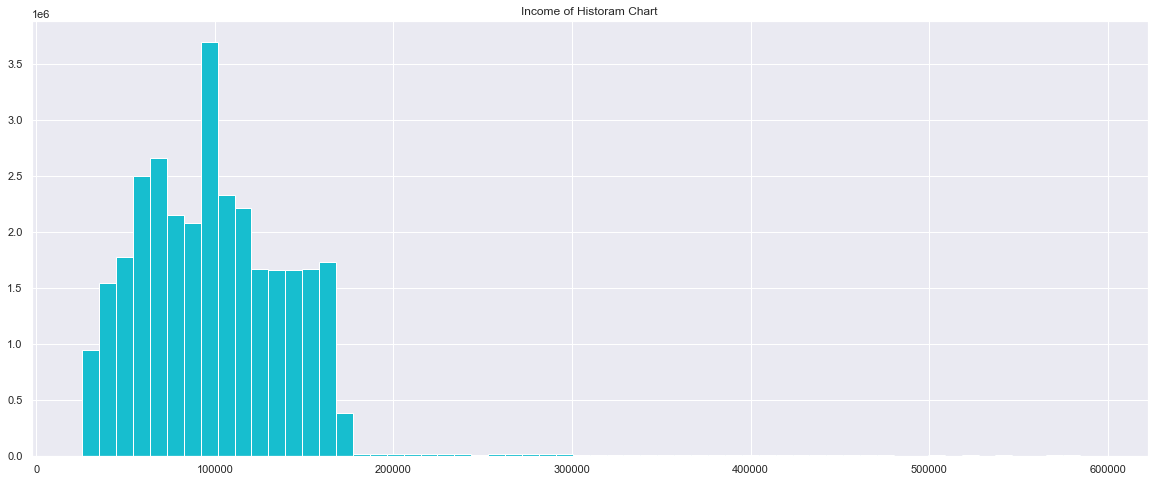

In [178]:
# Create a histogram
fig, ax = plt.subplots(figsize = (20, 8))

plt.hist(df_active['income'], bins = 60,color = 'tab:cyan', edgecolor = 'w')

# Create title
ax.set(title = 'Income of Historam Chart')

# Set x visible
plt.setp(ax.get_xticklabels(), visible=True)
# Hiding x and y_axis's tick
ax.tick_params(axis='both', which='both', length=0)

plt.show()

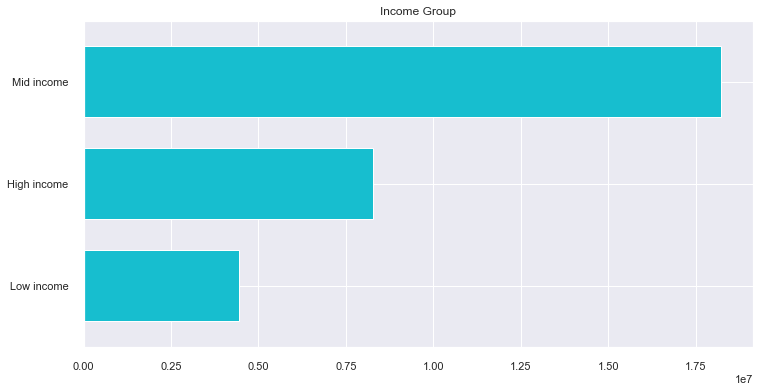

In [179]:
# bar chart showing the orders made for each department
fig, ax = plt.subplots(figsize = (12, 6))
df_active['income_group'].value_counts().sort_values().plot(kind = 'barh', width = 0.7, color = 'tab:cyan')
#Create a title
ax.set(title = 'Income Group')
plt.savefig(os.path.join(path,'barh_income.png'))
plt.show()

Mid income group (range between 52000 and 125000) hold the most customers for ordering our products.

#### c. Number of Dependants Profile

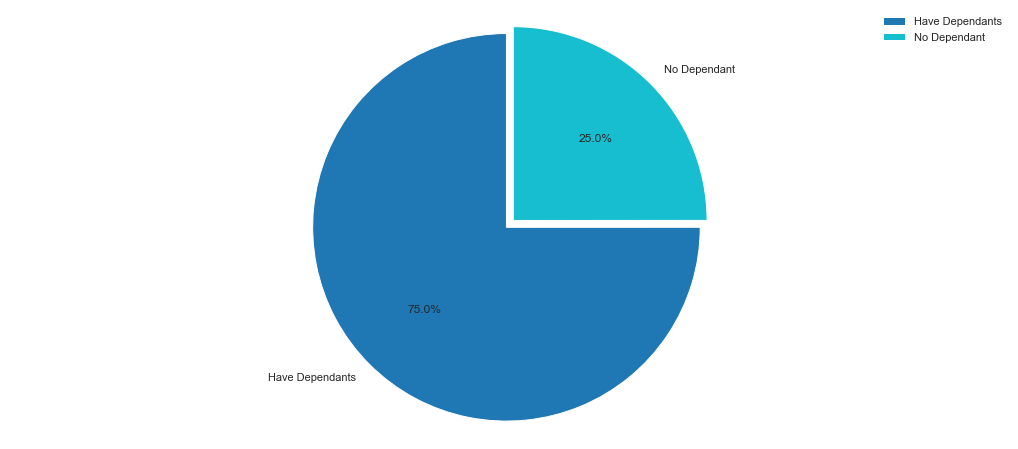

In [200]:
sns.set(rc = {'figure.figsize':(18,8)})
#Creating a pie chart for number of dependants

sizes = df_active['dependant_group'].value_counts()
labels = ['Have Dependants','No Dependant'] 
colors = ['tab:blue','tab:cyan'] 

explode = (0.05,0)
patches,text1,text2 = plt.pie(sizes,
                      explode = explode,
                      colors = colors,
                      labels = labels,
                      autopct = '%3.1f%%',
                      shadow = False, 
                      startangle = 90, 
                      pctdistance = 0.6) 
plt.axis('equal')
plt.legend()
plt.savefig(os.path.join(path,'pie_n_dependants.png'))
plt.show()

As we can see our customers who has dependant achive to 75% and those have non dependant only hold 25%, on the another hands, the most orders came from those customer who have a famlily.

#### d. bakery Profile distribution

###### First, I would like to see the department rank by create a bar chart

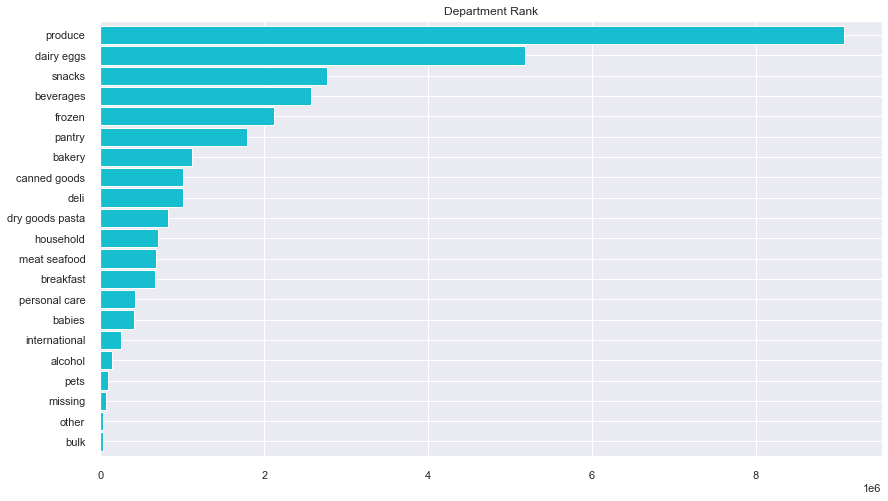

In [181]:
# bar chart showing the orders made for each department
fig, ax = plt.subplots(figsize = (14, 8))
df_active['department'].value_counts().sort_values().plot(kind = 'barh', width = 0.9, color = 'tab:cyan')
#Create a title
ax.set(title = 'Department Rank')
plt.savefig(os.path.join(path,'barh_rank_department'))
plt.show()

From this bar chart we can clearly to catch which department is first and which one is last, it can help our marketing department to create best strategy based on this rank.

In [158]:
df_active['bakery_status'].value_counts()

0    29843736
1     1120828
Name: bakery_status, dtype: int64

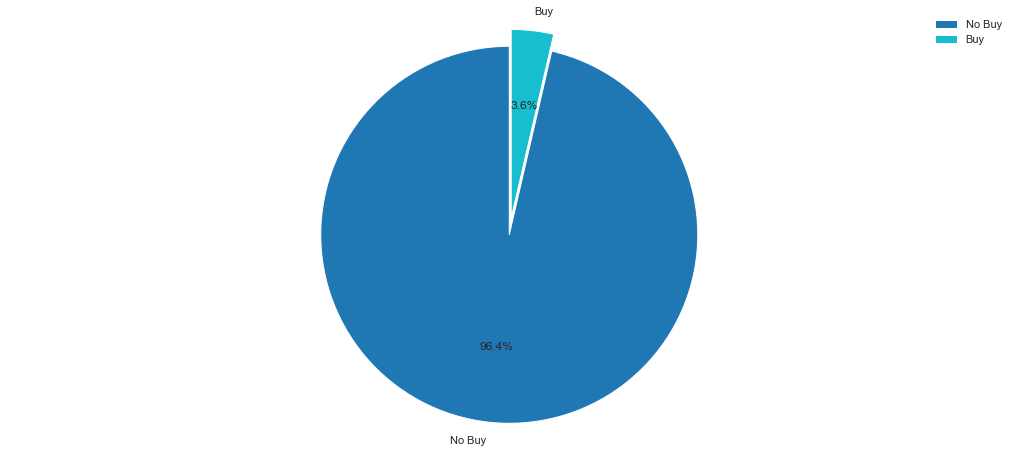

In [199]:
sns.set(rc = {'figure.figsize':(18,8)})
#Creating a pie chart for order status from bakery department
sizes = df_active['bakery_status'].value_counts()
labels = ['No Buy','Buy'] 
colors = ['tab:blue','tab:cyan'] 

explode = (0.09,0)
patches,text1,text2 = plt.pie(sizes,
                      explode = explode,
                      colors = colors,
                      labels = labels,
                      autopct = '%2.1f%%',
                      shadow = False, 
                      startangle = 90, 
                      pctdistance = 0.6) 
plt.axis('equal')
plt.legend()
plt.savefig(os.path.join(path,'pie_bakery_status.png'))
plt.show()

There is only 3.6% customers who ordered staffs from bakery department, this number would be have chance to increase in future if do sales on it.

#### e. Frozen Profile distribution

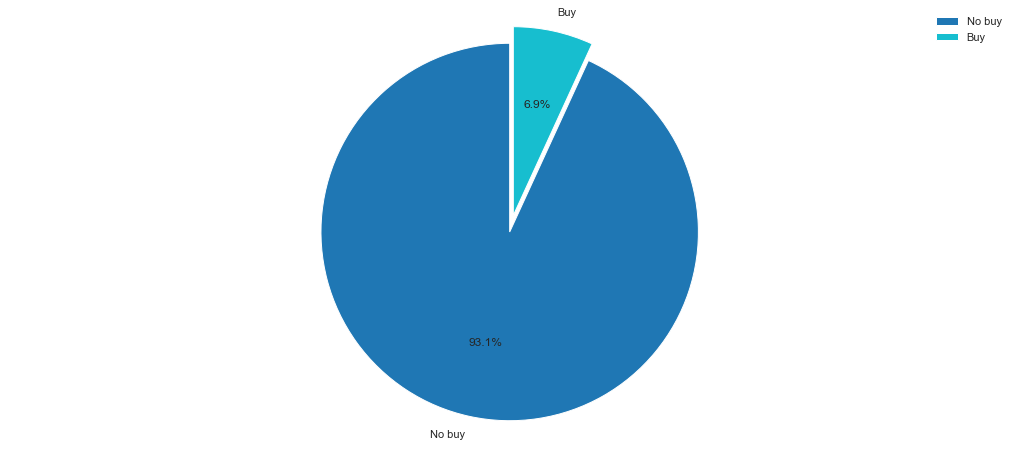

In [198]:
sns.set(rc = {'figure.figsize':(18, 8)})

# Creeating a pie chart for the status of customers in frozen department
sizes = df_active['frozen_status'].value_counts()
labels = ['No buy', 'Buy']
colors = ['tab:blue','tab:cyan']
explode = [0.09, 0]
patches, text1,text2 = plt.pie(sizes,
                              explode = explode,
                              colors = colors,
                              labels = labels,
                              autopct = '%2.1f%%',
                              shadow = False,
                              startangle = 90,
                              pctdistance = 0.6)
plt.axis('equal')
plt.legend()
plt.savefig(os.path.join(path,'pie_frozen_status.png'))
plt.show()

### 09. Exporting visualizations

In [211]:
df_final.to_pickle(os.path.join(path,'all_final.pkl'))

In [212]:
df_active.to_pickle(os.path.join(path,'final_all_columns.pkl'))